# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [ ]:
!pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl

In [ ]:
file1 = 'data2.pkl'

In [ ]:
df = joblib.load(file1)

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [ ]:
# 이미 앞서 NA 조치를 완료했으므로 따로 처리하지는 않겠습니다.
df.isna().sum()

car_cnt                    0
request_cnt                0
ride_cnt                   0
waiting_time               0
fare                       0
distance                   0
weekday                    0
month                      0
week                       0
year                       0
waiting_time_next_day      0
temp_max                   0
temp_min                   0
rain(mm)                   0
humidity_max(%)            0
humidity_min(%)            0
sunshine(MJ/m2)            0
season                     0
raining                    0
holiday                    0
waiting_time_last_7days    0
ride_rate(%)               0
dtype: int64

### (2) 가변수화

In [ ]:
df.head()

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,...,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,raining,holiday,waiting_time_last_7days,ride_rate(%)
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,410,4085,3676,24.7,2230,8646,Wednesday,1,2,2015,...,-9.2,0.0,62.0,27.0,10.09,Winter,0,0,23.657143,89.987760
2015-01-08,419,4030,3728,21.2,2231,8683,Thursday,1,2,2015,...,-6.8,0.0,78.0,38.0,8.74,Winter,0,0,23.371429,92.506203
2015-01-09,424,4167,3813,21.8,2215,8506,Friday,1,2,2015,...,-5.5,0.0,81.0,33.0,9.41,Winter,0,0,24.028571,91.504680
2015-01-10,215,1916,1645,41.2,2447,11123,Saturday,1,2,2015,...,-4.0,0.0,83.0,39.0,9.60,Winter,0,1,26.171429,85.855950
2015-01-11,187,1700,1572,28.8,2419,10806,Sunday,1,2,2015,...,-7.2,0.0,51.0,23.0,10.05,Winter,0,1,26.785714,92.470588


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2915 entries, 2015-01-07 to 2022-12-30
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   car_cnt                  2915 non-null   int64   
 1   request_cnt              2915 non-null   int64   
 2   ride_cnt                 2915 non-null   int64   
 3   waiting_time             2915 non-null   float64 
 4   fare                     2915 non-null   int64   
 5   distance                 2915 non-null   int64   
 6   weekday                  2915 non-null   object  
 7   month                    2915 non-null   int64   
 8   week                     2915 non-null   UInt32  
 9   year                     2915 non-null   int64   
 10  waiting_time_next_day    2915 non-null   float64 
 11  temp_max                 2915 non-null   float64 
 12  temp_min                 2915 non-null   float64 
 13  rain(mm)                 2915 non-null   floa

In [ ]:
# 가변수화 대상: weekday(요일), season(계절), year(년)
dumm_cols = ['weekday', 'season', 'year']

# 가변수화
df = pd.get_dummies(df, columns=dumm_cols)

# 확인
df.head()

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,month,week,waiting_time_next_day,temp_max,...,season_Autumn,season_Winter,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,410,4085,3676,24.7,2230,8646,1,2,21.2,-0.2,...,0,1,1,0,0,0,0,0,0,0
2015-01-08,419,4030,3728,21.2,2231,8683,1,2,21.8,3.2,...,0,1,1,0,0,0,0,0,0,0
2015-01-09,424,4167,3813,21.8,2215,8506,1,2,41.2,4.3,...,0,1,1,0,0,0,0,0,0,0
2015-01-10,215,1916,1645,41.2,2447,11123,1,2,28.8,2.3,...,0,1,1,0,0,0,0,0,0,0
2015-01-11,187,1700,1572,28.8,2419,10806,1,2,23.2,3.4,...,0,1,1,0,0,0,0,0,0,0


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

#### 1) x, y 나누기

In [ ]:
df.columns

Index(['car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'month', 'week', 'waiting_time_next_day', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'raining', 'holiday', 'waiting_time_last_7days',
       'ride_rate(%)', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'season_Spring', 'season_Summer', 'season_Autumn',
       'season_Winter', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'year_2021', 'year_2022'],
      dtype='object')

In [ ]:
x = df[['car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'raining', 'holiday', 'waiting_time_last_7days',
       'ride_rate(%)', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'year_2021', 'year_2022', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'season_Spring',
       'season_Summer', 'season_Autumn', 'season_Winter']]

In [ ]:
y = df['waiting_time_next_day']

In [ ]:
x.head()

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_Spring,season_Summer,season_Autumn,season_Winter
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-07,410,4085,3676,24.7,2230,8646,-0.2,-9.2,0.0,62.0,...,0,0,0,0,0,1,0,0,0,1
2015-01-08,419,4030,3728,21.2,2231,8683,3.2,-6.8,0.0,78.0,...,0,0,0,1,0,0,0,0,0,1
2015-01-09,424,4167,3813,21.8,2215,8506,4.3,-5.5,0.0,81.0,...,0,0,0,0,0,0,0,0,0,1
2015-01-10,215,1916,1645,41.2,2447,11123,2.3,-4.0,0.0,83.0,...,0,1,0,0,0,0,0,0,0,1
2015-01-11,187,1700,1572,28.8,2419,10806,3.4,-7.2,0.0,51.0,...,0,0,1,0,0,0,0,0,0,1


#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False)

In [ ]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=91, shuffle=False)

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [ ]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[0.21701795, 0.62917772, 0.67992384, ..., 0.        , 0.        ,
        1.        ],
       [0.22404372, 0.61945181, 0.69092448, ..., 0.        , 0.        ,
        1.        ],
       [0.22794692, 0.64367816, 0.70890628, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.41998439, 1.        , 0.99724984, ..., 0.        , 1.        ,
        0.        ],
       [0.40827479, 0.96445623, 0.96170933, ..., 0.        , 1.        ,
        0.        ],
       [0.41061671, 0.93386384, 0.92532261, ..., 0.        , 1.        ,
        0.        ]])

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [ ]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

### (1) 머신러닝

#### 1) 모델1 (LinearRegression)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

In [ ]:
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lr))

MAE: 4.350650901595991
MAPE: 0.10655380775691793


#### 2) 모델2 (KNeighborsRegressor)

In [ ]:
model_knr = KNeighborsRegressor()
model_knr.fit(x_train, y_train)
y_pred_knr = model_knr.predict(x_test)

In [ ]:
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_knr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_knr))

MAE: 7.475384615384616
MAPE: 0.17590510195072193


#### 그리드 서치

In [ ]:
param_grid = [{'n_neighbors':[3, 5, 7, 9], 'leaf_size':[10, 20, 30, 40, 50]}]
gs = GridSearchCV(estimator=model_knr, param_grid=param_grid, cv=2)
gs = gs.fit(x_train, y_train)

print(gs.best_params_)

{'leaf_size': 10, 'n_neighbors': 9}


In [ ]:
model_knr = KNeighborsRegressor(leaf_size=10, n_neighbors=3)
model_knr.fit(x_train, y_train)
y_pred_knr = model_knr.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_knr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_knr))

MAE: 7.508424908424907
MAPE: 0.17425872970257833


#### 3) 모델3 (Lasso)

In [ ]:
model_lasso = Lasso()
model_lasso.fit(x_train, y_train)
y_pred_lasso = model_lasso.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_lasso))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lasso))

MAE: 5.0284879399905895
MAPE: 0.12181383886316673


#### 그리드 서치

In [ ]:
param_grid = [{'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}]
gs = GridSearchCV(estimator=model_lasso, param_grid=param_grid, cv=2)
gs = gs.fit(x_train, y_train)

print(gs.best_params_)

{'alpha': 0.1}


In [ ]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(x_train, y_train)
y_pred_lasso = model_lasso.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_lasso))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lasso))

MAE: 4.241153769541096
MAPE: 0.10516297904688408


#### 4) 모델4 (Ridge)

In [ ]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)
y_pred_ridge = model_ridge.predict(x_test)

In [ ]:
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_ridge))

MAE: 4.340089710400058
MAPE: 0.1063846632515785


#### 그리드 서치

In [ ]:
param_grid = [{'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}]
gs = GridSearchCV(estimator=model_ridge, param_grid=param_grid, cv=2)
gs = gs.fit(x_train, y_train)

print(gs.best_params_)

{'alpha': 0.1}


In [ ]:
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(x_train, y_train)
y_pred_ridge = model_ridge.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_ridge))

MAE: 4.348558927056425
MAPE: 0.10652465136909157


#### 5) 모델5 (ElasticNet)

In [ ]:
model_el = ElasticNet()
model_el.fit(x_train, y_train)
y_pred_el = model_el.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_el))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_el))

MAE: 5.311863934871762
MAPE: 0.12487034497239533


#### 그리드 서치

In [ ]:
param_grid = [{'alpha':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}]
gs = GridSearchCV(estimator=model_el, param_grid=param_grid, cv=2)
gs = gs.fit(x_train, y_train)

print(gs.best_params_)

{'alpha': 0.1, 'l1_ratio': 1.0}


In [ ]:
model_el = ElasticNet(alpha=0.1, l1_ratio=1.0) # l1이 라쏘, l2가 릿지
model_el.fit(x_train, y_train)
y_pred_el = model_el.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_el))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_el))

MAE: 4.241153769541096
MAPE: 0.10516297904688408


#### 6) 모델6 (DecisionTreeRegressor)

In [ ]:
model_dtr = DTR(random_state=1)
model_dtr.fit(x_train, y_train)
y_pred_dtr = model_dtr.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_dtr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_dtr))

MAE: 6.205494505494505
MAPE: 0.15241848253979332


#### 그리드 서치

In [ ]:
param_grid = [{'max_features':[21, 28, 35], 'min_samples_split':[2,3,4,5,6], 'max_depth':[3,4,5,6,7,8,9,10]}]
gs = GridSearchCV(estimator=model_dtr, param_grid=param_grid, cv=2)
gs = gs.fit(x_train, y_train)

print(gs.best_params_)

{'max_depth': 5, 'max_features': 28, 'min_samples_split': 6}


In [ ]:
model_dtr = DTR(max_depth=5, max_features=14, min_samples_split=3)
model_dtr.fit(x_train, y_train)
y_pred_dtr = model_dtr.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_dtr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_dtr))

MAE: 6.041234864296098
MAPE: 0.14780031926913925


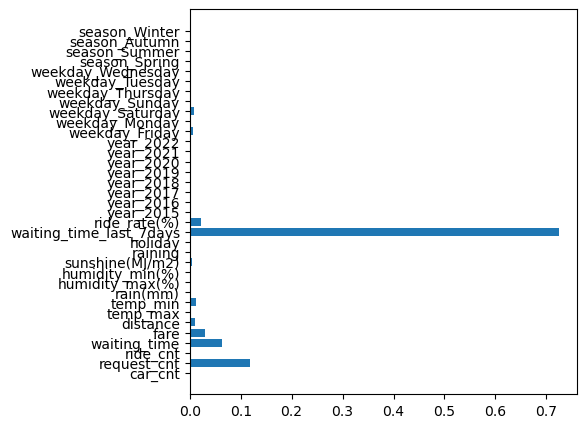

In [ ]:
# 변수 중요도를 보니 ride_rate(%), 지난 7일간 평균대기 시간, 전날 대기 시간, 요금 순서대로 변수 중요도가 높게 나온 점을 확인할 수 있습니다.

plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model_dtr.feature_importances_)
plt.show()

#### 7) 모델7 (RandomForestRegressor)

In [ ]:
model_rfr = RFR(random_state=1)
model_rfr.fit(x_train, y_train)
y_pred_rfr = model_rfr.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_rfr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_rfr))

MAE: 4.597747252747256
MAPE: 0.1145436803301038


#### 그리드 서치

In [ ]:
param_grid = [{'min_samples_split':[2,3,4,5], 'max_depth':[2,3,4,5,6,7,8]}]
gs = GridSearchCV(estimator=model_rfr, param_grid=param_grid, cv=2)
gs = gs.fit(x_train, y_train)

print(gs.best_params_)

{'max_depth': 5, 'min_samples_split': 2}


In [ ]:
model_rfr = RFR(max_depth=5, min_samples_split=3, random_state=1)
model_rfr.fit(x_train, y_train)
y_pred_rfr = model_rfr.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_rfr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_rfr))

MAE: 4.60702445314679
MAPE: 0.11337244588998913


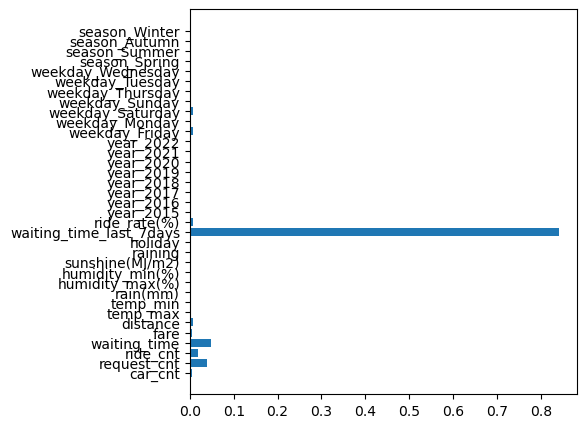

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model_rfr.feature_importances_)
plt.show()

#### 8) 모델8 (GradientBoostingRegressor)

In [ ]:
model_gbr = GBR()
model_gbr.fit(x_train, y_train)
y_pred_gbr = model_gbr.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_gbr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_gbr))

MAE: 4.607023719553413
MAPE: 0.11503984358955363


In [ ]:
param_grid = [{'learning_rate':[0.01, 0.05, 0.1, 0.5, 1.0], 'max_depth':[3, 5, 7, 10]}]
gs = GridSearchCV(estimator=model_gbr, param_grid=param_grid, cv=2)
gs = gs.fit(x_train, y_train)

print(gs.best_params_)

{'learning_rate': 0.05, 'max_depth': 3}


In [ ]:
model_gbr = GBR(learning_rate=0.05, max_depth=3)
model_gbr.fit(x_train, y_train)
y_pred_gbr = model_gbr.predict(x_test)

# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred_gbr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_gbr))

MAE: 4.633397981953108
MAPE: 0.11503294576609782


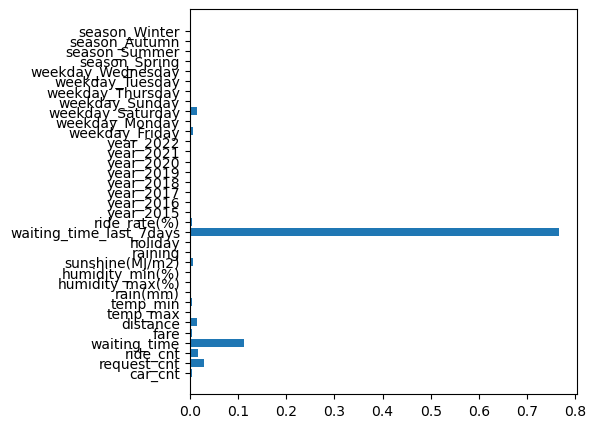

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model_gbr.feature_importances_)
plt.show()

### (2) 딥러닝

In [ ]:
# !pip install tensorflow

In [ ]:
import tensorflow as tf

#### 1) 모델1 (기본 모델)

In [ ]:
X = tf.keras.Input(shape=[35])
Y = tf.keras.layers.Dense(1)(X)
model_1 = tf.keras.Model(X, Y)
model_1.compile(loss='mae')
model_1.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 35)]              0         
                                                                 
 dense_34 (Dense)            (None, 1)                 36        
                                                                 
Total params: 36 (144.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1.fit(x_train, y_train, epochs = 1000, validation_split = 0.2, batch_size = 128)

Epoch 1/1000
18/18 [==============================] - 1s 15ms/step - loss: 41.5128 - val_loss: 33.9136
Epoch 2/1000
18/18 [==============================] - 0s 7ms/step - loss: 41.2978 - val_loss: 33.7239
Epoch 3/1000
18/18 [==============================] - 0s 6ms/step - loss: 41.1080 - val_loss: 33.5393
Epoch 4/1000
18/18 [==============================] - 0s 6ms/step - loss: 40.9209 - val_loss: 33.3558
Epoch 5/1000
18/18 [==============================] - 0s 6ms/step - loss: 40.7341 - val_loss: 33.1730
Epoch 6/1000
18/18 [==============================] - 0s 7ms/step - loss: 40.5474 - val_loss: 32.9897
Epoch 7/1000
18/18 [==============================] - 0s 7ms/step - loss: 40.3606 - val_loss: 32.8064
Epoch 8/1000
18/18 [==============================] - 0s 7ms/step - loss: 40.1740 - val_loss: 32.6235
Epoch 9/1000
18/18 [==============================] - 0s 6ms/step - loss: 39.9875 - val_loss: 32.4399
Epoch 10/1000
18/18 [==============================] - 0s 7ms/step - loss: 39.800

18/18 [==============================] - 0s 6ms/step - loss: 26.7283 - val_loss: 19.4261
Epoch 81/1000
18/18 [==============================] - 0s 5ms/step - loss: 26.5417 - val_loss: 19.2434
Epoch 82/1000
18/18 [==============================] - 0s 5ms/step - loss: 26.3550 - val_loss: 19.0596
Epoch 83/1000
18/18 [==============================] - 0s 6ms/step - loss: 26.1683 - val_loss: 18.8769
Epoch 84/1000
18/18 [==============================] - 0s 6ms/step - loss: 25.9815 - val_loss: 18.6930
Epoch 85/1000
18/18 [==============================] - 0s 6ms/step - loss: 25.7948 - val_loss: 18.5097
Epoch 86/1000
18/18 [==============================] - 0s 6ms/step - loss: 25.6080 - val_loss: 18.3264
Epoch 87/1000
18/18 [==============================] - 0s 7ms/step - loss: 25.4218 - val_loss: 18.1440
Epoch 88/1000
18/18 [==============================] - 0s 5ms/step - loss: 25.2354 - val_loss: 17.9611
Epoch 89/1000
18/18 [==============================] - 0s 6ms/step - loss: 25.0493 - va

18/18 [==============================] - 0s 6ms/step - loss: 14.2119 - val_loss: 7.9653
Epoch 160/1000
18/18 [==============================] - 0s 6ms/step - loss: 14.1057 - val_loss: 7.9001
Epoch 161/1000
18/18 [==============================] - 0s 6ms/step - loss: 14.0000 - val_loss: 7.8368
Epoch 162/1000
18/18 [==============================] - 0s 6ms/step - loss: 13.8954 - val_loss: 7.7761
Epoch 163/1000
18/18 [==============================] - 0s 6ms/step - loss: 13.7936 - val_loss: 7.7193
Epoch 164/1000
18/18 [==============================] - 0s 6ms/step - loss: 13.6926 - val_loss: 7.6633
Epoch 165/1000
18/18 [==============================] - 0s 7ms/step - loss: 13.5938 - val_loss: 7.6111
Epoch 166/1000
18/18 [==============================] - 0s 6ms/step - loss: 13.4953 - val_loss: 7.5625
Epoch 167/1000
18/18 [==============================] - 0s 6ms/step - loss: 13.3980 - val_loss: 7.5179
Epoch 168/1000
18/18 [==============================] - 0s 5ms/step - loss: 13.3031 - va

18/18 [==============================] - 0s 6ms/step - loss: 10.3926 - val_loss: 6.8340
Epoch 239/1000
18/18 [==============================] - 0s 6ms/step - loss: 10.3740 - val_loss: 6.8234
Epoch 240/1000
18/18 [==============================] - 0s 6ms/step - loss: 10.3553 - val_loss: 6.8161
Epoch 241/1000
18/18 [==============================] - 0s 6ms/step - loss: 10.3368 - val_loss: 6.8065
Epoch 242/1000
18/18 [==============================] - 0s 5ms/step - loss: 10.3181 - val_loss: 6.7985
Epoch 243/1000
18/18 [==============================] - 0s 6ms/step - loss: 10.3002 - val_loss: 6.7873
Epoch 244/1000
18/18 [==============================] - 0s 6ms/step - loss: 10.2818 - val_loss: 6.7773
Epoch 245/1000
18/18 [==============================] - 0s 5ms/step - loss: 10.2638 - val_loss: 6.7670
Epoch 246/1000
18/18 [==============================] - 0s 6ms/step - loss: 10.2456 - val_loss: 6.7577
Epoch 247/1000
18/18 [==============================] - 0s 6ms/step - loss: 10.2275 - va

18/18 [==============================] - 0s 6ms/step - loss: 9.0984 - val_loss: 6.1577
Epoch 319/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.0843 - val_loss: 6.1517
Epoch 320/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.0705 - val_loss: 6.1469
Epoch 321/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.0565 - val_loss: 6.1366
Epoch 322/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.0426 - val_loss: 6.1322
Epoch 323/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.0289 - val_loss: 6.1237
Epoch 324/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.0149 - val_loss: 6.1157
Epoch 325/1000
18/18 [==============================] - 0s 6ms/step - loss: 9.0012 - val_loss: 6.1088
Epoch 326/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.9876 - val_loss: 6.1004
Epoch 327/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.9742 - val_loss: 6.

18/18 [==============================] - 0s 6ms/step - loss: 8.0879 - val_loss: 5.7325
Epoch 399/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.0766 - val_loss: 5.7284
Epoch 400/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.0653 - val_loss: 5.7227
Epoch 401/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.0544 - val_loss: 5.7172
Epoch 402/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.0437 - val_loss: 5.7110
Epoch 403/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.0328 - val_loss: 5.7062
Epoch 404/1000
18/18 [==============================] - 0s 5ms/step - loss: 8.0216 - val_loss: 5.7014
Epoch 405/1000
18/18 [==============================] - 0s 6ms/step - loss: 8.0107 - val_loss: 5.6987
Epoch 406/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.9994 - val_loss: 5.6940
Epoch 407/1000
18/18 [==============================] - 0s 4ms/step - loss: 7.9881 - val_loss: 5.

18/18 [==============================] - 0s 6ms/step - loss: 7.3068 - val_loss: 5.4037
Epoch 479/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.2986 - val_loss: 5.3998
Epoch 480/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.2907 - val_loss: 5.3953
Epoch 481/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.2828 - val_loss: 5.3907
Epoch 482/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.2746 - val_loss: 5.3861
Epoch 483/1000
18/18 [==============================] - 0s 5ms/step - loss: 7.2666 - val_loss: 5.3828
Epoch 484/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.2585 - val_loss: 5.3801
Epoch 485/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.2508 - val_loss: 5.3754
Epoch 486/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.2430 - val_loss: 5.3720
Epoch 487/1000
18/18 [==============================] - 0s 6ms/step - loss: 7.2355 - val_loss: 5.

18/18 [==============================] - 0s 6ms/step - loss: 6.7911 - val_loss: 5.2081
Epoch 559/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.7861 - val_loss: 5.2069
Epoch 560/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.7811 - val_loss: 5.2056
Epoch 561/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.7762 - val_loss: 5.2045
Epoch 562/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.7713 - val_loss: 5.2028
Epoch 563/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.7664 - val_loss: 5.2011
Epoch 564/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.7614 - val_loss: 5.1987
Epoch 565/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.7563 - val_loss: 5.1971
Epoch 566/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.7515 - val_loss: 5.1959
Epoch 567/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.7466 - val_loss: 5.

18/18 [==============================] - 0s 6ms/step - loss: 6.4942 - val_loss: 5.1225
Epoch 639/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.4920 - val_loss: 5.1224
Epoch 640/1000
18/18 [==============================] - 0s 5ms/step - loss: 6.4895 - val_loss: 5.1216
Epoch 641/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.4873 - val_loss: 5.1216
Epoch 642/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.4850 - val_loss: 5.1210
Epoch 643/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.4828 - val_loss: 5.1210
Epoch 644/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.4806 - val_loss: 5.1209
Epoch 645/1000
18/18 [==============================] - 0s 5ms/step - loss: 6.4783 - val_loss: 5.1209
Epoch 646/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.4762 - val_loss: 5.1201
Epoch 647/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.4740 - val_loss: 5.

18/18 [==============================] - 0s 6ms/step - loss: 6.3601 - val_loss: 5.1249
Epoch 719/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.3591 - val_loss: 5.1252
Epoch 720/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.3579 - val_loss: 5.1252
Epoch 721/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.3569 - val_loss: 5.1251
Epoch 722/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.3556 - val_loss: 5.1252
Epoch 723/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.3543 - val_loss: 5.1251
Epoch 724/1000
18/18 [==============================] - 0s 5ms/step - loss: 6.3532 - val_loss: 5.1250
Epoch 725/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.3520 - val_loss: 5.1248
Epoch 726/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.3508 - val_loss: 5.1246
Epoch 727/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.3496 - val_loss: 5.

18/18 [==============================] - 0s 5ms/step - loss: 6.2913 - val_loss: 5.1160
Epoch 799/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2907 - val_loss: 5.1164
Epoch 800/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2898 - val_loss: 5.1157
Epoch 801/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2891 - val_loss: 5.1153
Epoch 802/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2884 - val_loss: 5.1159
Epoch 803/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2876 - val_loss: 5.1155
Epoch 804/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2870 - val_loss: 5.1160
Epoch 805/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2864 - val_loss: 5.1159
Epoch 806/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2855 - val_loss: 5.1153
Epoch 807/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2849 - val_loss: 5.

18/18 [==============================] - 0s 6ms/step - loss: 6.2444 - val_loss: 5.0902
Epoch 879/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2440 - val_loss: 5.0905
Epoch 880/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.2436 - val_loss: 5.0895
Epoch 881/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2430 - val_loss: 5.0886
Epoch 882/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2423 - val_loss: 5.0892
Epoch 883/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2420 - val_loss: 5.0893
Epoch 884/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2414 - val_loss: 5.0892
Epoch 885/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2412 - val_loss: 5.0884
Epoch 886/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2405 - val_loss: 5.0879
Epoch 887/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.2401 - val_loss: 5.

18/18 [==============================] - 0s 5ms/step - loss: 6.2074 - val_loss: 5.0421
Epoch 959/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2068 - val_loss: 5.0423
Epoch 960/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2067 - val_loss: 5.0415
Epoch 961/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.2062 - val_loss: 5.0406
Epoch 962/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2056 - val_loss: 5.0397
Epoch 963/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2054 - val_loss: 5.0404
Epoch 964/1000
18/18 [==============================] - 0s 5ms/step - loss: 6.2047 - val_loss: 5.0407
Epoch 965/1000
18/18 [==============================] - 0s 5ms/step - loss: 6.2045 - val_loss: 5.0407
Epoch 966/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2039 - val_loss: 5.0387
Epoch 967/1000
18/18 [==============================] - 0s 5ms/step - loss: 6.2035 - val_loss: 5.

In [ ]:
ev1 = model_1.evaluate(x_test, y_test, verbose = 0)
print("손실 함수(MAE):", ev1)

손실 함수(MAE): 4.399270534515381


In [ ]:
pred_1 = model_1.predict(x_test)
print("평균절대값백분율오차(MAPE):", sum(abs(y_test-pred_1.flatten())/y_test)/len(x_test))

3/3 [==============================] - 0s 2ms/step
평균절대값백분율오차(MAPE): 0.10620721120622628


#### 2) 모델2 (은닉층 추가, 옵티마이저 Adam 사용, 과적합 방지하기 위한 EarlyStopping)

In [ ]:
X = tf.keras.Input(shape=[35])
H = tf.keras.layers.Dense(16, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model_2 = tf.keras.Model(X, Y)
model_2.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')
model_2.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 35)]              0         
                                                                 
 dense_35 (Dense)            (None, 16)                576       
                                                                 
 dense_36 (Dense)            (None, 8)                 136       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early = tf.keras.callbacks.EarlyStopping(patience = 20, restore_best_weights=True)
model_2.fit(x_train, y_train, epochs = 1000, validation_split = 0.2, batch_size = 128, callbacks = [early])

Epoch 1/1000
18/18 [==============================] - 1s 18ms/step - loss: 39.8680 - val_loss: 27.6972
Epoch 2/1000
18/18 [==============================] - 0s 7ms/step - loss: 24.0021 - val_loss: 8.4091
Epoch 3/1000
18/18 [==============================] - 0s 7ms/step - loss: 11.5739 - val_loss: 6.6626
Epoch 4/1000
18/18 [==============================] - 0s 7ms/step - loss: 8.4629 - val_loss: 5.3261
Epoch 5/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.8628 - val_loss: 6.1063
Epoch 6/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.4582 - val_loss: 4.9604
Epoch 7/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.3169 - val_loss: 4.8944
Epoch 8/1000
18/18 [==============================] - 0s 6ms/step - loss: 6.2595 - val_loss: 5.0164
Epoch 9/1000
18/18 [==============================] - 0s 7ms/step - loss: 6.1527 - val_loss: 4.5286
Epoch 10/1000
18/18 [==============================] - 0s 8ms/step - loss: 6.1772 - val_loss: 4

In [ ]:
ev2 = model_2.evaluate(x_test, y_test, verbose = 0)
print("손실 함수(MAE):", ev2)

손실 함수(MAE): 4.394061088562012


In [ ]:
pred_2 = model_2.predict(x_test)
print("평균절대값백분율오차(MAPE):", sum(abs(y_test-pred_2.flatten())/y_test)/len(x_test))

3/3 [==============================] - 0s 4ms/step
평균절대값백분율오차(MAPE): 0.10611006702868994


#### 3) 딥러닝 모델 (정규화, 드롭아웃도 함께 적용)

In [ ]:
# 희재님 모델
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
X = tf.keras.Input(shape = [35])
H = tf.keras.layers.Dense(32)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dropout(0.4)(H)
H = tf.keras.layers.Dense(16)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dropout(0.4)(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.Model(X, Y)
model.compile(loss = 'mae')
early = tf.keras.callbacks.EarlyStopping(patience = 20, restore_best_weights=True)
model.fit(x_train, y_train, epochs = 1000, validation_split = 0.2, batch_size = 128, callbacks = [early])
y_pred = model.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

Epoch 1/1000
18/18 [==============================] - 1s 16ms/step - loss: 41.6379 - val_loss: 33.9954
Epoch 2/1000
18/18 [==============================] - 0s 7ms/step - loss: 41.3754 - val_loss: 33.9257
Epoch 3/1000
18/18 [==============================] - 0s 6ms/step - loss: 41.2284 - val_loss: 33.8465
Epoch 4/1000
18/18 [==============================] - 0s 6ms/step - loss: 41.1169 - val_loss: 33.7766
Epoch 5/1000
18/18 [==============================] - 0s 8ms/step - loss: 40.9107 - val_loss: 33.6827
Epoch 6/1000
18/18 [==============================] - 0s 6ms/step - loss: 40.7104 - val_loss: 33.5664
Epoch 7/1000
18/18 [==============================] - 0s 6ms/step - loss: 40.5711 - val_loss: 33.4654
Epoch 8/1000
18/18 [==============================] - 0s 7ms/step - loss: 40.3836 - val_loss: 33.3385
Epoch 9/1000
18/18 [==============================] - 0s 7ms/step - loss: 40.1666 - val_loss: 33.2099
Epoch 10/1000
18/18 [==============================] - 0s 8ms/step - loss: 40.018

18/18 [==============================] - 0s 6ms/step - loss: 11.8582 - val_loss: 6.1809
Epoch 81/1000
18/18 [==============================] - 0s 6ms/step - loss: 11.3376 - val_loss: 5.8460
Epoch 82/1000
18/18 [==============================] - 0s 7ms/step - loss: 11.4573 - val_loss: 5.8944
Epoch 83/1000
18/18 [==============================] - 0s 7ms/step - loss: 11.5281 - val_loss: 5.7709
Epoch 84/1000
18/18 [==============================] - 0s 6ms/step - loss: 11.2988 - val_loss: 5.7121
Epoch 85/1000
18/18 [==============================] - 0s 7ms/step - loss: 11.4733 - val_loss: 5.7635
Epoch 86/1000
18/18 [==============================] - 0s 7ms/step - loss: 11.1786 - val_loss: 5.6167
Epoch 87/1000
18/18 [==============================] - 0s 6ms/step - loss: 11.1286 - val_loss: 5.5268
Epoch 88/1000
18/18 [==============================] - 0s 7ms/step - loss: 11.5852 - val_loss: 5.6348
Epoch 89/1000
18/18 [==============================] - 0s 7ms/step - loss: 11.1844 - val_loss: 5

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

### 1. 머신러닝

* 1-1. LinearRegression {MAE: 4.3704, MAPE: 0.1104}
* 1-2. KNeighborsRegressor {MAE: 5.2131, MAPE: 0.1324}, 그리드 서치 진행 : {MAE : 5.3216, MAPE: 0.1361}
* 1-3. Lasso {MAE: 4.9979, MAPE: 0.1213}, 그리드 서치 진행 : {MAE: 4.2644, MAPE: 0.1073}
* 1-4. Ridge {MAE: 4.3720, MAPE: 0.1108}, 그리드 서치 진행 : {MAE: 4.3642, MAPE: 0.1103}
* 1-5. ElasticNet {MAE: 5.1049, MAPE: 0.1215}, 그리드 서치 진행 : {MAE: 4.2644, MAPE: 0.1073}
* 1-6. DecisionTreeRegressor {MAE: 6.3000, MAPE: 0.1515},  그리드 서치 진행 : {MAE: 5.8244, MAPE: 0.1384}
* 1-7. RandomForestRegressor {MAE: 4.5550, MAPE: 0.1141}, 그리드 서치 진행 : {MAE: 4.5876, MAPE: 0.1131}
* 1-8. GradientBoostingRegressor {MAE: 4.5990, MAPE: 0.1144}, 그리드 서치 진행 : {MAE: 4.5514, MAPE: 0.1134}

### 2. 딥러닝 (epoch 1000회)
* 2-1. 은닉층, optimizer, earlystopping 사용 X {MAE : 4.8101, MAPE : 0.12399594509869215}
* 2-2. 은닉층(3층 신경망), optimizer로 Adam(학습률 0.01) 사용 {MAE : 4.4881, MAPE : 0.1141}
* 2-3. 복잡한 신경망(배치 정규화, 드롭 아웃까지 모두 적용) {MAE : 4.7677, MAPE : 0.1153}

## 결론
---

1. 머신러닝 모델에서는 성능이 대부분 비슷하지만, 미세한 차이로 Lasso, Ridge, ElasticNet 등의 선형 회귀 모델이 앙상블 모델에 비해 비교적 높게 나왔습니다.

---
2. feature importance를 비교한 결과, 지난 7일 간의 평균 대기 시간, 요청건, 탑승건, 지난 날의 대기 시간, 주말여부(토요일, 일요일) 등의 변수가 다음 날의 대기 시간에 영향을 주는데 역할을 하는 점을 파악했습니다.
---
3. 딥러닝 모델에서는 기본 신경망보다 은닉층을 추가하거나, 옵티마이저를 사용한 모델이 성능이 역시 좋게 나왔습니다.

---
4. 딥러닝 모델을 너무 복잡하게 만들면 오히려 성능이 저하될 수도 있다는 결론이 나왔습니다.